# Flipkart Product Reviews - Sentiment Analysis Using LSTM

## Introduction

Understanding user sentiment is critical for platforms like Flipkart, where customer feedback directly impacts product rankings, buyer trust, and sales. This project walks through an end-to-end pipeline to analyze customer reviews and predict sentiment using deep learning techniques, particularly the LSTM (Long Short-Term Memory) model.

---

## 🔗 Table of Contents

- [Import Libraries](#import-libraries)
- [Load the dataset](#load-the-dataset)
- [data preprocessing and EDA(Exploratory data analysis)](#data-preprocessing-and-edaexploratory-data-analysis)
- [Create our independent and dependent columns](#create-our-independent-and-dependent-columns)
- [Splitting the Data:](#splitting-the-data)
- [Tokenization and Padding:](#tokenization-and-padding)
- [LSTM Model:](#lstm-model)

---

##  Work Done (Step-by-Step Summary)

### Import Libraries
All necessary libraries are imported here, including `pandas`, `numpy`, `matplotlib`, and TensorFlow/Keras for deep learning. These form the backbone of the data processing and model-building steps.

### Load the dataset
The Flipkart product review dataset is loaded and briefly inspected. Basic shape, column info, and a few entries are printed to understand its structure.

### data preprocessing and EDA(Exploratory data analysis)
- We began by checking for missing values using `.isnull().sum()` and `.info()` to ensure data quality. It was observed that some rows were missing `review_text` or `sentiment` values.
- Rows with missing `review_text` were dropped because textual input is essential for NLP-based sentiment analysis — a missing review cannot be processed or meaningfully interpreted.
- Similarly, entries with missing sentiment labels were also removed, as they cannot be used for supervised learning unless manually labeled.
- We chose not to fill missing values for these critical fields since any form of imputation (e.g., replacing text with placeholders or guessing sentiment) could introduce bias or noise into the model.
- If needed, non-critical fields (such as product category or user name, if available) could be filled using `fillna('Unknown')` or by statistical methods (e.g., mode or median), but this was not necessary in our case.
- After cleaning, we ensured that the remaining dataset had no null values in essential columns before proceeding to the next steps.
- Text cleaning steps were then applied, including lowercasing, punctuation removal, stop-word elimination, and optional stemming or lemmatization to normalize the input.
- Sentiment labels were explored to check class balance, and class distributions were visualized using bar plots and histograms.
- This preprocessing step ensures the model is trained on clean, complete, and consistent input, improving both accuracy and generalization.


### Create our independent and dependent columns
- Review text is separated as the **independent variable (X)**.
- Sentiment label is extracted as the **dependent variable (y)**.
- Labels are encoded into numeric format for compatibility with deep learning models.

### Splitting the Data:
- The dataset is split into training and testing sets (typically using an 80/20 or 70/30 ratio).
- Ensures the model is trained and validated on separate data to avoid overfitting.

### Tokenization and Padding:
- Text data is tokenized using Keras' `Tokenizer`.
- Sequences are padded to ensure uniform input length for the LSTM model.
- This step converts unstructured text into a structured numerical format that deep learning models require.

###  LSTM Model:
- A Sequential LSTM model is defined and trained.
- It includes embedding layers, LSTM layers, dropout for regularization, and dense layers for output.
- The model is compiled with a loss function (`binary_crossentropy`) and evaluated on accuracy.
- Results (accuracy, loss) are tracked, and performance is visualized over epochs.


##  Why This Approach Works

The use of an LSTM model is ideal for this task because:

- ✅ **LSTMs handle sequences**: They are designed to capture long-term dependencies in sequences like natural language text.
- ✅ **Context retention**: LSTM can remember the context and structure in reviews, improving prediction accuracy.
- ✅ **Better than traditional ML**: Unlike SVMs or logistic regression with TF-IDF, LSTM models understand word order and semantics, which are critical in sentiment analysis.
- ✅ **Scalable and end-to-end**: Once trained, this model can be deployed in production for real-time sentiment tagging of customer reviews.

This pipeline reflects a real-world NLP application combining deep learning and review analysis at scale.


# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
from spacy.tokens import Doc
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.metrics import accuracy_score

# **Load the dataset**

In [3]:
# Load your dataset into a pandas DataFrame
df = pd.read_csv("Dataset-SA.csv")
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


# **data preprocessing and EDA(Exploratory data analysis)**

In [4]:
## check the dataset shape
df.shape

(205052, 6)

In [5]:
## check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [6]:
## Check Missing values in our dataset
df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df['Sentiment'].value_counts()

Sentiment
positive    147171
negative     24401
neutral       8807
Name: count, dtype: int64

<Axes: xlabel='Sentiment'>

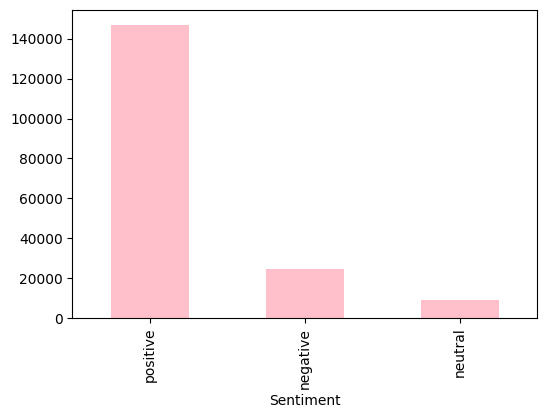

In [9]:
df['Sentiment'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

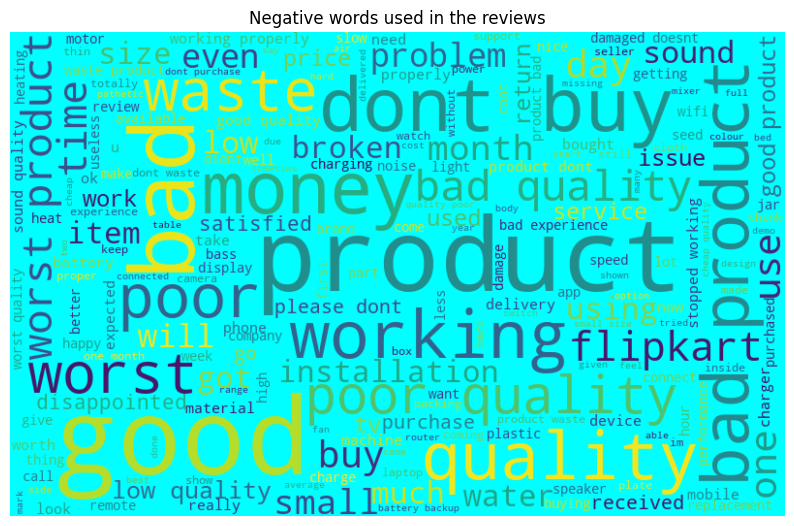

In [10]:
## Getting the wordcloud of Summary words that was used for the negative.
publish_words =' '.join([text for text in df['Summary'][df['Sentiment'] == 'negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(publish_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Negative words used in the reviews')
plt.show()

Text(0.5, 1.0, 'frequently negative words used  - Top 40')

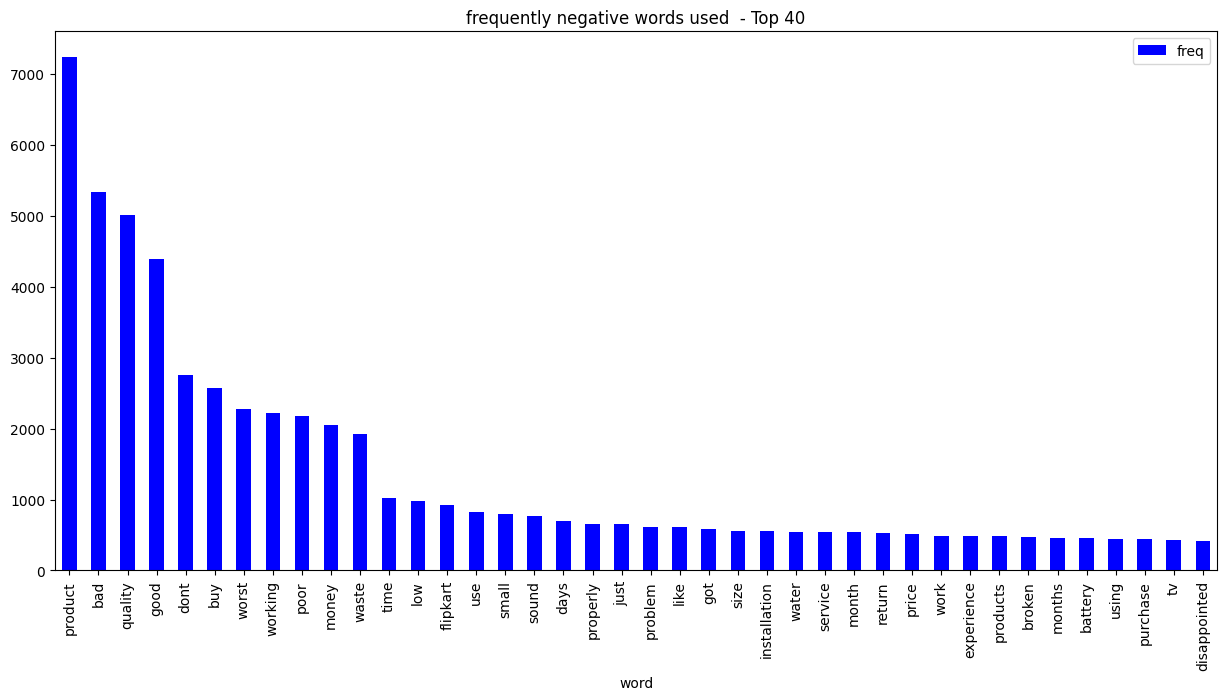

In [11]:
## Getting most frequently negative words used in the reviews

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df['Summary'][df['Sentiment'] == 'negative'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(40).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("frequently negative words used  - Top 40")

In [16]:
# Load spaCy NLP model
nlp = spacy.load("en_core_web_sm")

In [12]:
# function for text cleaning
def clean_text(text_column):
    cleaned_texts = []

    for text in text_column:
        # Step 1: Text Lowercasing
        text = text.lower()

        # Step 2: Tokenization
        doc = nlp(text)
        tokens = [token.text for token in doc]

        # Step 3: Stop Word Removal
        filtered_tokens = [token for token in tokens if not nlp.vocab[token].is_stop]

        # Step 4: Lemmatization
        lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(filtered_tokens))]

        # Step 5: Reconstruct the cleaned text
        cleaned_text = " ".join(lemmatized_tokens)
        cleaned_texts.append(cleaned_text)

    return cleaned_texts

In [13]:
# Clean the 'Summary review column' and create a new 'cleaned_text' column
df["cleaned_text"] = clean_text(df["Summary"])

In [14]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment,cleaned_text
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,great cool excellent air flow price amazing un...
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,good budget 2 fit cool nice cooling
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,quality good power air decent
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,bad product fan
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,ok ok product


In [15]:
# so we can remove the other summary column now
df.drop(columns='Summary',inplace=True)

# **Create our independent and dependent columns**

In [16]:
# Define a dictionary to map sentiment labels to numerical values
sentiment_mapping = {"negative": 0, "neutral": 1, "positive": 2}

# Replace values in the 'Sentiment' column using the dictionary
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

In [17]:
X=df['cleaned_text']
y=df['Sentiment']

# **Splitting the Data:**

In [18]:
#Split  dataset into training and testing sets for model training and evaluation.
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# **Tokenization and Padding:**

In [19]:
#Tokenize the text and pad sequences to ensure consistent input lengths for the LSTM model.


# Create a tokenizer and fit it on the training data
tokenizer = Tokenizer(num_words=5000)  # You can adjust the vocabulary size as needed
tokenizer.fit_on_texts(X_train)

# Save the tokenizer to a file
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

# Convert text to sequences and pad them
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100  # Adjust the sequence length as needed
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length)

# **LSTM Model:**

In [20]:
model = Sequential()

# Embedding layer: Maps words to dense vectors
model.add(Embedding(input_dim=5000, output_dim=32, input_length=max_sequence_length))

# LSTM layer: Processes sequential data
model.add(LSTM(100, return_sequences=True))  # Use return_sequences=True to stack LSTM layers
model.add(LSTM(75, return_sequences=True))
model.add(LSTM(50))



# Dense layers: Fully connected layers for learning complex patterns
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer to reduce overfitting
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))


# Output layer: Use softmax for multi-class classification
model.add(Dense(3, activation='softmax'))  # 3 classes: negative, neutral, positive

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model
model.fit(X_train_padded, y_train,
          validation_data=(X_test_padded, y_test),
          epochs=15,
          batch_size=128)


Epoch 1/15
1128/1128 [==============================] - 71s 51ms/step - loss: 0.3255 - accuracy: 0.8936 - val_loss: 0.2659 - val_accuracy: 0.9153
Epoch 2/15
1128/1128 [==============================] - 25s 22ms/step - loss: 0.2566 - accuracy: 0.9177 - val_loss: 0.2496 - val_accuracy: 0.9186
Epoch 3/15
1128/1128 [==============================] - 25s 22ms/step - loss: 0.2369 - accuracy: 0.9235 - val_loss: 0.2469 - val_accuracy: 0.9193
Epoch 4/15
1128/1128 [==============================] - 23s 21ms/step - loss: 0.2235 - accuracy: 0.9273 - val_loss: 0.2445 - val_accuracy: 0.9197
Epoch 5/15
1128/1128 [==============================] - 25s 22ms/step - loss: 0.2128 - accuracy: 0.9308 - val_loss: 0.2505 - val_accuracy: 0.9198
Epoch 6/15
1128/1128 [==============================] - 24s 21ms/step - loss: 0.2041 - accuracy: 0.9329 - val_loss: 0.2599 - val_accuracy: 0.9184
Epoch 7/15
1128/1128 [==============================] - 23s 21ms/step - loss: 0.1965 - accuracy: 0.9354 - val_loss: 0.2648 -

1128/1128 [==============================] - 9s 7ms/step


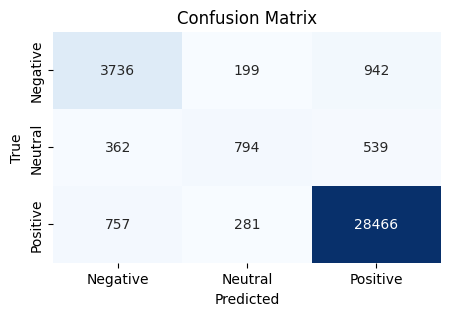

In [21]:
from sklearn.metrics import confusion_matrix

# Assuming you have a trained model 'model'
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)


confusion = confusion_matrix(y_test, y_pred_classes)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(5,3))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the LSTM model to a file
lstm_model_filename = 'saved_lstm_model.h5'
model.save(lstm_model_filename)